In [ ]:
from TradingviewData import TradingViewData,Interval
import pandas as pd

request = TradingViewData()

In [2]:
request.search('METAL','MCX')

Expecting value: line 1 column 1 (char 0)


[]

In [8]:
nifty_data = request.get_hist(symbol='BNBUSD',exchange='BINANCE',interval=Interval.daily,n_bars=1461)

nifty_data

,symbol,open,high,low,close,volume
datetime,,,,,,
2022-01-22 01:00:00,BINANCE:BNBUSD,384.3,389.2,339.0,358.3,329736.143
2022-01-23 01:00:00,BINANCE:BNBUSD,358.4,388.9,356.7,384.4,187432.297
2022-01-24 01:00:00,BINANCE:BNBUSD,384.4,384.4,337.6,371.6,232897.687
2022-01-25 01:00:00,BINANCE:BNBUSD,371.0,388.4,357.8,385.5,151576.325
2022-01-26 01:00:00,BINANCE:BNBUSD,385.4,402.2,366.8,375.4,163893.454
...,...,...,...,...,...,...
2026-01-17 01:00:00,BINANCE:BNBUSD,937.5,958.8,935.2,946.8,22369.402
2026-01-18 01:00:00,BINANCE:BNBUSD,946.6,953.0,931.5,932.2,7715.388
2026-01-19 01:00:00,BINANCE:BNBUSD,931.8,931.8,902.6,922.9,17478.560


In [12]:
# 1) Descarga muchas velas diarias (máx. 5000)
bnb_data = request.get_hist(
    symbol='BNBUSD',
    exchange='BINANCE',
    interval=Interval.daily,
    n_bars=2000  # suficiente para abarcar 2022-2025
)

# 2) Asegura que el índice es datetime (por si acaso)
bnb_data.index = pd.to_datetime(bnb_data.index)

# 3) Filtra por rango de fechas
bnb_data = bnb_data.loc['2022-01-01':'2025-12-31']
bnb_data

,symbol,open,high,low,close,volume
datetime,,,,,,
2022-01-01 01:00:00,BINANCE:BNBUSD,511.9,534.1,504.9,527.7,100329.702225
2022-01-02 01:00:00,BINANCE:BNBUSD,527.0,541.3,514.6,531.4,87246.017355
2022-01-03 01:00:00,BINANCE:BNBUSD,530.9,538.0,503.4,511.8,105315.913898
2022-01-04 01:00:00,BINANCE:BNBUSD,511.5,528.0,497.1,507.0,120806.687716
2022-01-05 01:00:00,BINANCE:BNBUSD,507.6,522.8,458.5,474.1,165525.098824
...,...,...,...,...,...,...
2025-12-27 01:00:00,BINANCE:BNBUSD,834.7,845.9,834.3,844.8,3535.181000
2025-12-28 01:00:00,BINANCE:BNBUSD,845.2,866.6,839.0,859.2,9519.891000
2025-12-29 01:00:00,BINANCE:BNBUSD,858.9,871.2,845.5,851.5,15606.814000


In [21]:
print("1) ¿Cómo son los datos?")
print(bnb_data.info())   # columnas, tipo de dato y cuántos valores hay

print("\n2) ¿Hay datos vacíos (nulos)?")
print(bnb_data.isna().sum())  # cuántos vacíos hay en cada columna

print("\n3) ¿Están repetidas algunas filas?")
print("Filas repetidas:", bnb_data.duplicated().sum())

print("\n4) Resumen de los números (mínimo, máximo, media...)")
print(bnb_data.describe())

print("\n5) ¿Faltan días en la serie?")
daily = bnb_data.copy()
daily.index = daily.index.date  # quita la hora, deja solo AAAA-MM-DD

full_range = pd.date_range(start='2022-01-01', end='2025-12-31', freq='D').date
missing_days = sorted(set(full_range) - set(daily.index))

print("DÍAS QUE FALTAN:", len(missing_days))
print("EJEMPLO:", missing_days[:10])



1) ¿Cómo son los datos?
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2022-01-01 01:00:00 to 2025-12-31 01:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  1461 non-null   object 
 1   open    1461 non-null   float64
 2   high    1461 non-null   float64
 3   low     1461 non-null   float64
 4   close   1461 non-null   float64
 5   volume  1461 non-null   float64
dtypes: float64(5), object(1)
memory usage: 112.2+ KB
None

2) ¿Hay datos vacíos (nulos)?
symbol    0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

3) ¿Están repetidas algunas filas?
Filas repetidas: 0

4) Resumen de los números (mínimo, máximo, media...)
              open         high          low        close         volume
count  1461.000000  1461.000000  1461.000000  1461.000000    1461.000000
mean    476.430322   487.000411   465.288501   476.655510   48678.097737
std     227.583742   233.332067   2

<Axes: >

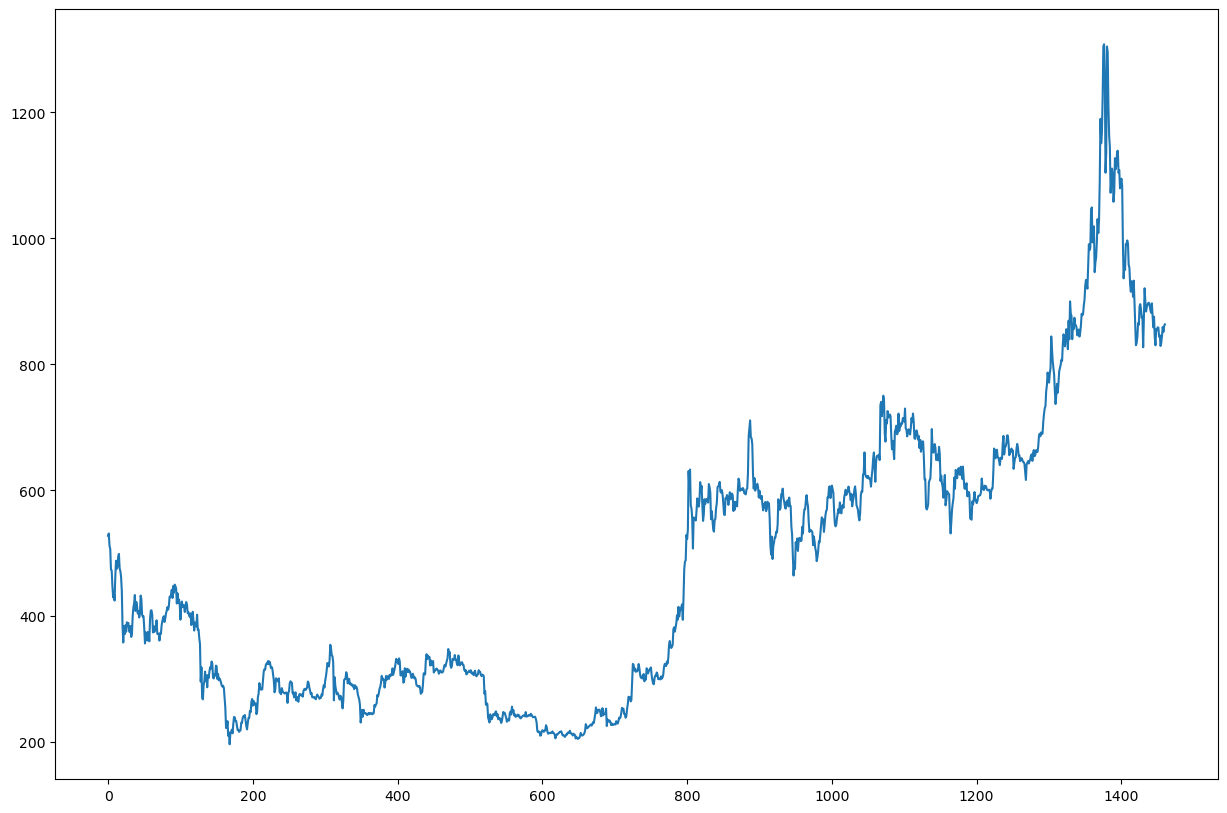

In [13]:
bnb_data.close.plot(figsize=(15,10),use_index=False)

In [17]:
import os

# Asegúrate de que el índice es datetime
bnb_data.index = pd.to_datetime(bnb_data.index)

# Diccionario para nombres de meses en español (opcional)
meses = {
    1: "01-enero",
    2: "02-febrero",
    3: "03-marzo",
    4: "04-abril",
    5: "05-mayo",
    6: "06-junio",
    7: "07-julio",
    8: "08-agosto",
    9: "09-septiembre",
    10: "10-octubre",
    11: "11-noviembre",
    12: "12-diciembre"
}

base_symbol = "BNBUSD"  # raíz de la carpeta

for year in sorted(bnb_data.index.year.unique()):
    for month in sorted(bnb_data[bnb_data.index.year == year].index.month.unique()):
        # Filtramos datos de ese año y mes
        df_month = bnb_data[(bnb_data.index.year == year) & (bnb_data.index.month == month)]

        if df_month.empty:
            continue  # por si acaso

        # Eliminamos la columna 'symbol' si existe
        if 'symbol' in df_month.columns:
            df_month = df_month.drop(columns=['symbol'])

        nombre_mes = meses[month]  # en texto

        # Carpeta: BNBUSD / año / mes_en_letras
        folder_path = os.path.join(f"{base_symbol}", str(year), nombre_mes)
        os.makedirs(folder_path, exist_ok=True)

        # Nombre del CSV
        file_path = os.path.join(folder_path, f"{base_symbol}_{year}_{month:02d}.csv")

        # Guardar CSV sin la columna 'symbol'
        df_month.to_csv(file_path, index=True)
